## Data Preparation for Anomaly Detection

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

### Step 1: create a single data file

In [2]:
# this first section reads all the files, calculate the mean for each one and add a single row
# to the RESULT_FILE. THe RESULT_FILE will be saved as csv and used for the model development
#
# each detail file is 1 sec and contains 20K points (8 readings (8 sensor) for point)

# nome del file finale
RESULT_FILE_NAME = "BearingNasaTest1.csv"

# directory dei dati che usiamo
data_dir = 'bearings/1st_test'

# This dataframe will contain a songle row (with mean) for file
result_data = pd.DataFrame()

n_files = 0

for filename in os.listdir(data_dir):

    n_files += 1    
    # simple progress bar (one point per file)
    print(".", end = '')
    
    file = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    
    # calcolo la media, colonna per colonna, su tutto il file
    # troncare max 4 cifre decimali (nel file sono 3)
    # è importante prendere abs !!!
    
    file_mean_abs = np.array(round(file.abs().mean(), 4))
    
    # risultato: shape (8,)
    # fa la reshape per aggiungere come riga al dataframe
    file_mean_abs = pd.DataFrame(file_mean_abs.reshape(1, 8))
    
    # usa come indice il nome del file (quindi data ed ora)
    file_mean_abs.index = [filename]
    
    # aggiunge al dataframe complessivo
    result_data = result_data.append(file_mean_abs)

# in test1 we have 2 sensors (acc. x, y axis) for each bearing, 8 readings a time
print("")
print(("Total files processed: %d" %(n_files)))

result_data.columns = ['Br11','Br12','Br21','Br22', 'Br31','Br32','Br41','Br42']

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [3]:
result_data.head()

,Br11,Br12,Br21,Br22,Br31,Br32,Br41,Br42
2003.10.22.12.06.24,0.1041,0.1003,0.1071,0.1020,0.1061,0.1082,0.0948,0.0995
2003.10.22.12.09.13,0.1037,0.0999,0.1082,0.1029,0.1067,0.1085,0.0951,0.0936
2003.10.22.12.14.13,0.1050,0.1015,0.1085,0.1040,0.1087,0.1099,0.0962,0.0983
2003.10.22.12.19.13,0.1049,0.1016,0.1082,0.1034,0.1081,0.1100,0.0968,0.0986
2003.10.22.12.24.13,0.1048,0.1022,0.1079,0.1026,0.1085,0.1093,0.0964,0.0985


In [4]:
# we must be sure that rows are in cronological order
result_data.index = pd.to_datetime(result_data.index, format='%Y.%m.%d.%H.%M.%S')
result_data = result_data.sort_index()

# save data in csv
result_data.to_csv(RESULT_FILE_NAME)

result_data.head()

,Br11,Br12,Br21,Br22,Br31,Br32,Br41,Br42
2003-10-22 12:06:24,0.1041,0.1003,0.1071,0.1020,0.1061,0.1082,0.0948,0.0995
2003-10-22 12:09:13,0.1037,0.0999,0.1082,0.1029,0.1067,0.1085,0.0951,0.0936
2003-10-22 12:14:13,0.1050,0.1015,0.1085,0.1040,0.1087,0.1099,0.0962,0.0983
2003-10-22 12:19:13,0.1049,0.1016,0.1082,0.1034,0.1081,0.1100,0.0968,0.0986
2003-10-22 12:24:13,0.1048,0.1022,0.1079,0.1026,0.1085,0.1093,0.0964,0.0985


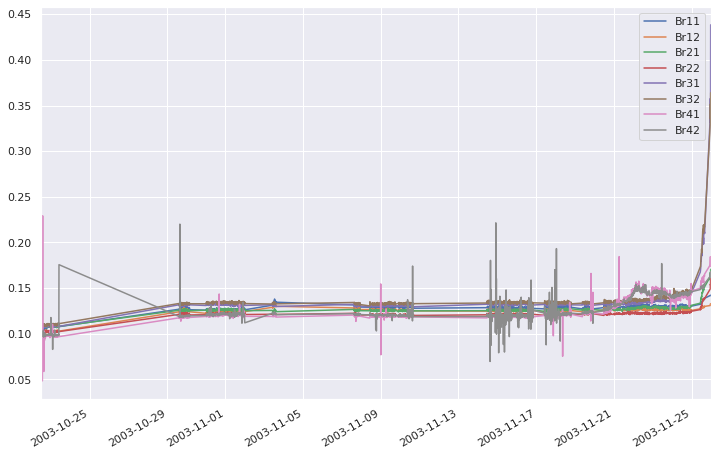

In [5]:
# plot all data
result_data.plot(figsize = (12,8))